<a href="https://colab.research.google.com/github/Yosiwealth/Deep-Learning/blob/master/CNN_keras_intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%pylab inline
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
from scipy import signal
i = np.random.randint(x_train.shape[0])



c = x_train[i,:,:]
plt.imshow(c,cmap='gray'); plt.axis('off');
plt.title('original image');
plt.figure(figsize=(18,8))
for i in range(10):
    k = -1.0 + 1.0*np.random.rand(3,3)
    c_digit = signal.convolve2d(c, k, boundary='symm', mode='same');
    plt.subplot(2,5,i+1);
    plt.imshow(c_digit,cmap='gray'); plt.axis('off');

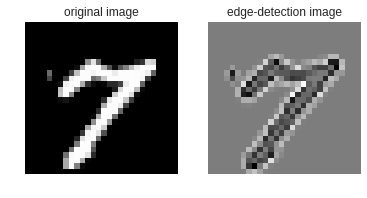

In [4]:
#define edge-detection filter
k = [
    [0, 1, 0],
    [1,-4, 1],
    [0, 1, 0]
    ]

plt.figure();
plt.subplot(1,2,1);
plt.imshow(c,cmap='gray'); plt.axis('off');
plt.title('original image');

plt.subplot(1,2,2);
c_digit = signal.convolve2d(c, k, boundary='symm', mode='same');
plt.imshow(c_digit,cmap='gray'); plt.axis('off');
plt.title('edge-detection image');   

In [5]:
batch_size = 128
nb_classes = 10
nb_epoch = 6

# input image dimensions
img_rows, img_cols = 28, 28
# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
pool_size = (2, 2)
# convolution kernel size
kernel_size = (3, 3)

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

#sub-sample of test data to improve training speed. Comment out
#if you want to train on full dataset.
x_train = x_train[:20000,:,:,:]
y_train = y_train[:20000]

#normalise the images and double check the shape and size of the image data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_test_inds = y_test.copy()
y_train_inds = y_train.copy()
y_train = keras.utils.to_categorical(y_train, nb_classes)
y_test = keras.utils.to_categorical(y_test, nb_classes)

x_train shape: (20000, 28, 28, 1)
20000 train samples
10000 test samples


In [0]:
#Create sequential convolutional multi-layer perceptron with max pooling and dropout
#uncomment layers below to produce a more accurate score (in the interest of time we use a shallower model)
model = Sequential()
model.add(Conv2D(nb_filters, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))  
#model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
#model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(nb_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 5408)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                54090     
Total params: 54,410
Trainable params: 54,410
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.fit(x_train, y_train, batch_size=batch_size, epochs=nb_epoch,
          verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 20000 samples, validate on 10000 samples
Epoch 1/6
20000/20000 [==============================] - 14s 715us/step - loss: 0.7217 - acc: 0.8043 - val_loss: 0.2977 - val_acc: 0.9161
Epoch 2/6
20000/20000 [==============================] - 14s 691us/step - loss: 0.3041 - acc: 0.9117 - val_loss: 0.2184 - val_acc: 0.9385
Epoch 3/6
20000/20000 [==============================] - 14s 694us/step - loss: 0.2369 - acc: 0.9307 - val_loss: 0.1760 - val_acc: 0.9497
Epoch 4/6
20000/20000 [==============================] - 14s 694us/step - loss: 0.1935 - acc: 0.9419 - val_loss: 0.1472 - val_acc: 0.9573
Epoch 5/6
20000/20000 [==============================] - 14s 694us/step - loss: 0.1712 - acc: 0.9491 - val_loss: 0.1277 - val_acc: 0.9635
Epoch 6/6
20000/20000 [==============================] - 14s 693us/step - loss: 0.1521 - acc: 0.9555 - val_loss: 0.1141 - val_acc: 0.9664
Test loss: 0.11413001421615482
Test accuracy: 0.9664


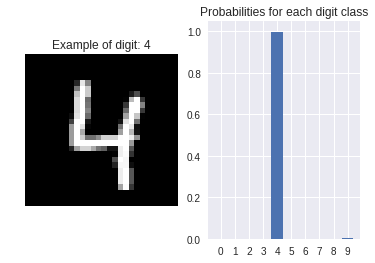

In [9]:
#choose a random data from test set and show probabilities for each class.
i = np.random.randint(0,len(x_test))
digit = x_test[i].reshape(28,28)

plt.figure();
plt.subplot(1,2,1);
plt.title('Example of digit: {}'.format(y_test_inds[i]));
plt.imshow(digit,cmap='gray'); plt.axis('off');
probs = model.predict_proba(digit.reshape(1,28,28,1),batch_size=1)
plt.subplot(1,2,2);
plt.title('Probabilities for each digit class');
plt.bar(np.arange(10),probs.reshape(10),align='center'); plt.xticks(np.arange(10),np.arange(10).astype(str));

In [10]:
predictions = model.predict_classes(x_test, batch_size=32, verbose=1)

10000/10000 [==============================] - 2s 220us/step


In [0]:
inds = np.arange(len(predictions))
wrong_results = inds[y_test_inds!=predictions]

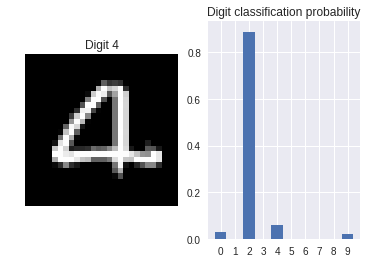

In [12]:
#choose a random wrong result from the test set
i = np.random.randint(0,len(wrong_results))
i = wrong_results[i]
digit = x_test[i].reshape(28,28)

plt.figure();

plt.subplot(1,2,1);
plt.title('Digit {}'.format(y_test_inds[i]));
plt.imshow(digit,cmap='gray'); plt.axis('off');
probs = model.predict_proba(digit.reshape(1,28,28,1),batch_size=1)
plt.subplot(1,2,2);
plt.title('Digit classification probability');
plt.bar(np.arange(10),probs.reshape(10),align='center'); plt.xticks(np.arange(10),np.arange(10).astype(str));

In [13]:
prediction_probs = model.predict_proba(x_test, batch_size=32, verbose=1)

10000/10000 [==============================] - 2s 240us/step


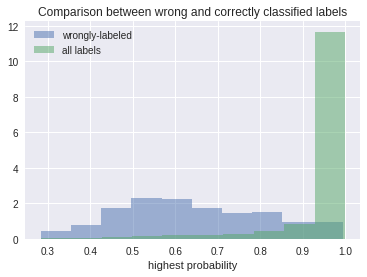

In [14]:
wrong_probs = np.array([prediction_probs[ind][digit] for ind,digit in zip(wrong_results,predictions[wrong_results])])
all_probs =  np.array([prediction_probs[ind][digit] for ind,digit in zip(np.arange(len(predictions)),predictions)])
#plot as histogram
plt.hist(wrong_probs,alpha=0.5,normed=True,label='wrongly-labeled');
plt.hist(all_probs,alpha=0.5,normed=True,label='all labels');
plt.legend();
plt.title('Comparison between wrong and correctly classified labels');
plt.xlabel('highest probability');

In [15]:
print (model.layers[0].get_weights()[0].shape)

(3, 3, 1, 32)


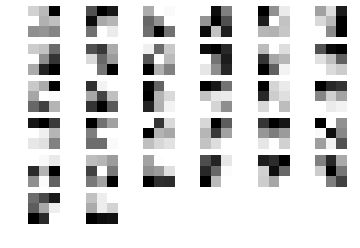

In [16]:
weights = model.layers[0].get_weights()[0]
for i in range(nb_filters):
    plt.subplot(6,6,i+1)
    plt.imshow(weights[:,:,0,i],cmap='gray',interpolation='none'); plt.axis('off');

In [0]:
#Create new sequential model, same as before but just keep the convolutional layer.
model_new = Sequential()
model_new.add(Conv2D(nb_filters, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

In [0]:
#set weights for new model from weights trained on MNIST.
for i in range(1):
    model_new.layers[i].set_weights(model.layers[i].get_weights())

In [0]:
#pick a random digit and "predict" on this digit (output will be first layer of CNN)
i = np.random.randint(0,len(x_test))
digit = x_test[i].reshape(1,28,28,1)
pred = model_new.predict(digit)

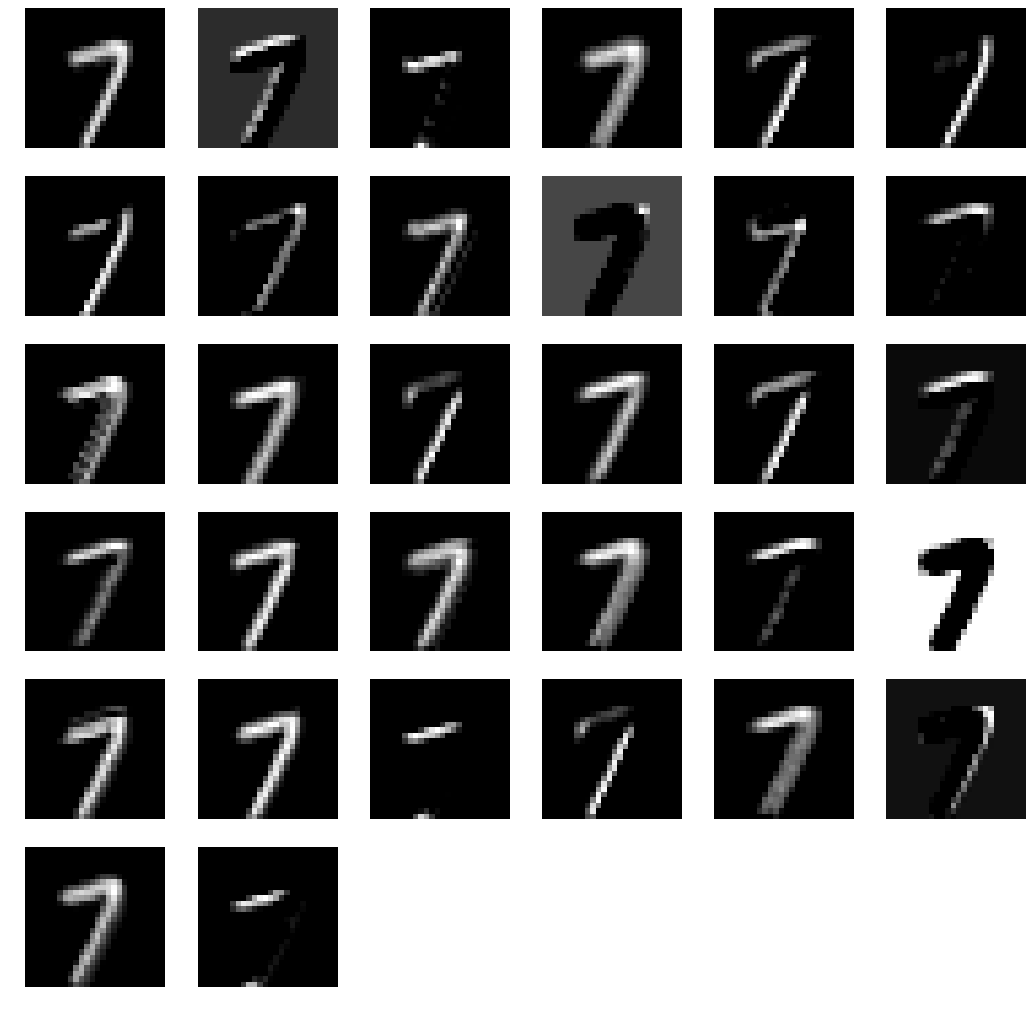

In [20]:
#For all the filters, plot the output of the input
plt.figure(figsize=(18,18))
filts = pred[0]
for i in range(nb_filters):
    filter_digit = filts[:,:,i]
    plt.subplot(6,6,i+1)
    plt.imshow(filter_digit,cmap='gray'); plt.axis('off');